# RNN based LSTM_github

https://github.com/blurred-machine/RNN-based-Stock-Price-Prediction-using-LSTM/blob/master/model.py

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [47]:
# 민경씨와 동일한 작업
df = pd.read_excel('/Users/hamhyewon/Downloads/back_data.xlsx')

df.drop('총거래금액(원)', axis=1, inplace=True)
df['평균기온(°C)'] = df['평균기온(°C)'].fillna(round(np.mean(df['평균기온(°C)']),2))
df['최대 풍속(m/s)'] = df['최대 풍속(m/s)'].fillna(round(np.mean(df['최대 풍속(m/s)']), 2))
df['최다풍향'] = df['최다풍향'].fillna(round(np.mean(df['최다풍향']), 2))
df['평균 이슬점온도(°C)'] = df['평균 이슬점온도(°C)'].fillna(round(np.mean(df['평균 이슬점온도(°C)']), 2))
df['평균 상대습도(%)'] = df['평균 상대습도(%)'].fillna(round(np.mean(df['평균 상대습도(%)']), 2))
df['평균 증기압(hPa)'] = df['평균 증기압(hPa)'].fillna(round(np.mean(df['평균 증기압(hPa)']), 2))
df['평균 현지기압(hPa)'] = df['평균 현지기압(hPa)'].fillna(round(np.mean(df['평균 현지기압(hPa)']), 2))
df['최저 해면기압(hPa)'] = df['최저 해면기압(hPa)'].fillna(round(np.mean(df['최저 해면기압(hPa)']), 2))
df['평균 해면기압(hPa)'] = df['평균 해면기압(hPa)'].fillna(round(np.mean(df['평균 해면기압(hPa)']), 2))
df = df[df['환산'] != 0]
df.set_index('일시', inplace=True)
df = df.iloc[:-1]

In [48]:
# 민경씨와 동일한 작업
df = pd.read_excel('/Users/hamhyewon/Downloads/back_data.xlsx')

df.drop('총거래금액(원)', axis=1, inplace=True)
df['평균기온(°C)'] = df['평균기온(°C)'].fillna(round(np.mean(df['평균기온(°C)']),2))
df['최대 풍속(m/s)'] = df['최대 풍속(m/s)'].fillna(round(np.mean(df['최대 풍속(m/s)']), 2))
df['최다풍향'] = df['최다풍향'].fillna(round(np.mean(df['최다풍향']), 2))
df['평균 이슬점온도(°C)'] = df['평균 이슬점온도(°C)'].fillna(round(np.mean(df['평균 이슬점온도(°C)']), 2))
df['평균 상대습도(%)'] = df['평균 상대습도(%)'].fillna(round(np.mean(df['평균 상대습도(%)']), 2))
df['평균 증기압(hPa)'] = df['평균 증기압(hPa)'].fillna(round(np.mean(df['평균 증기압(hPa)']), 2))
df['평균 현지기압(hPa)'] = df['평균 현지기압(hPa)'].fillna(round(np.mean(df['평균 현지기압(hPa)']), 2))
df['최저 해면기압(hPa)'] = df['최저 해면기압(hPa)'].fillna(round(np.mean(df['최저 해면기압(hPa)']), 2))
df['평균 해면기압(hPa)'] = df['평균 해면기압(hPa)'].fillna(round(np.mean(df['평균 해면기압(hPa)']), 2))
df = df[df['환산'] != 0]
df.set_index('일시', inplace=True)
df = df.iloc[:-1]

In [49]:
df.columns

Index(['평균가격(원)', '총거래물량(kg)', '환산', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수량',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향', '최대 풍속(m/s)', '최대 풍속 풍향', '평균 풍속(m/s)',
       '풍정합(100m)', '최다풍향', '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최저 해면기압(hPa)',
       '평균 해면기압(hPa)', '평균 지면온도(°C)', '최저 초상온도(°C)', '취약계층수'],
      dtype='object')

In [50]:
# Create a new dataframe with only the 'Close' column 
data = df.filter(['평균가격(원)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1211

In [51]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.12276303],
       [0.09181802],
       [0.18283252],
       ...,
       [0.79648708],
       [0.84327195],
       [0.76669493]])

In [52]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.12276303, 0.09181802, 0.18283252, 0.17104421, 0.17126927,
       0.13320589, 0.12548138, 0.11434623, 0.10263519, 0.09796146,
       0.108563  , 0.11554774, 0.11242435, 0.11748301, 0.12602766,
       0.0631574 , 0.10417501, 0.14585993, 0.13889252, 0.03682922,
       0.0841639 , 0.04929071, 0.11533602, 0.09030193, 0.1370907 ,
       0.13115898, 0.12470794, 0.10650405, 0.0957158 , 0.09932102,
       0.0901837 , 0.07558503, 0.14476649, 0.13429733, 0.14111314,
       0.03293846, 0.13634373, 0.18573497, 0.13175252, 0.13594158,
       0.1230978 , 0.08076114, 0.12681273, 0.10277214, 0.11165522,
       0.18594834, 0.15595053, 0.17220111, 0.16621169, 0.19280731,
       0.17833552, 0.1873755 , 0.14263289, 0.18257269, 0.09985275,
       0.12733201, 0.19895922, 0.13821558, 0.14177167, 0.16516666])]
[0.15311243399618968]

[array([0.12276303, 0.09181802, 0.18283252, 0.17104421, 0.17126927,
       0.13320589, 0.12548138, 0.11434623, 0.10263519, 0.09796146,
       0.108563  , 0.11554774, 0.11

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=5)
df = pd.DataFrame(history.history)

Epoch 1/5


1151/1151 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 0.0184
Epoch 2/5
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0096
Epoch 3/5
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0071
Epoch 4/5
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0080
Epoch 5/5
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0068


In [54]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


11648.951913886105

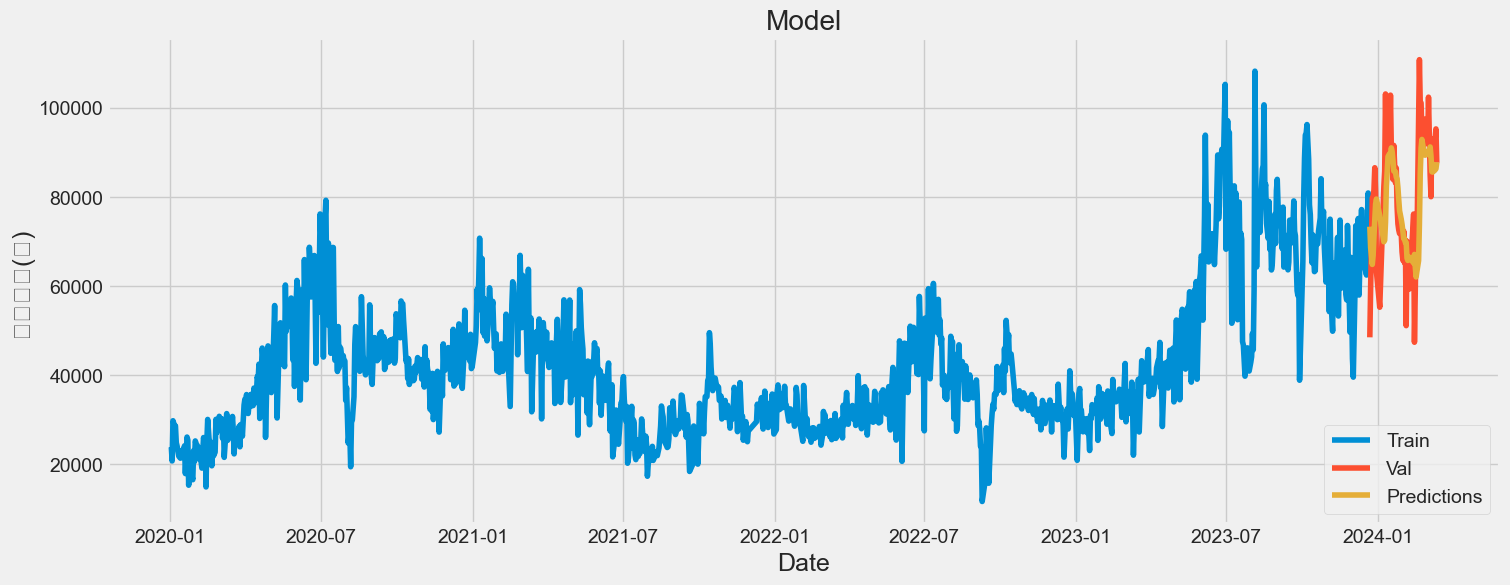

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('평균가격(원)', fontsize=18)
plt.plot(train['평균가격(원)'])
plt.plot(valid[['평균가격(원)', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
# Show the valid and predicted prices
valid

,평균가격(원),Predictions
일시,,
2023-12-22,48481.880292,73295.820312
2023-12-23,59836.309524,68595.648438
2023-12-25,79744.995225,64832.140625
2023-12-26,80029.700779,66814.671875
2023-12-27,81514.261854,71053.812500
...,...,...
2024-03-07,89017.336423,85537.601562
2024-03-08,88017.406893,85829.000000
2024-03-09,90588.023414,85836.023438
